In [1]:
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
cd /Users/George/Desktop/ASTR 480/scikit-learn/doc/tutorial/text_analytics/data/movie_reviews/

/Users/George/Desktop/ASTR 480/scikit-learn/doc/tutorial/text_analytics/data/movie_reviews


In [3]:
run fetch_data.py

In [4]:
movie_reviews_data_folder = '/Users/George/Desktop/ASTR 480/scikit-learn/doc/tutorial/text_analytics/data/movie_reviews/txt_sentoken/'

In [5]:
dataset = load_files(movie_reviews_data_folder, shuffle=False)

In [6]:
print("n_samples: %d" % len(dataset.data))

n_samples: 2000


In [24]:
# 25 percent of code used to test the data
docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

In [25]:
pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
        ('clf', LinearSVC(C=1000))])

In [26]:
# are unigrams or bigrams better? Bigrams: N=2
parameters = {'vect__ngram_range': [(1, 1), (1, 2)]}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=3,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vect__ngram_range': [(1, 1), (1, 2)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
          % (grid_search.cv_results_['params'][i],
             grid_search.cv_results_['mean_test_score'][i],
             grid_search.cv_results_['std_test_score'][i]))

0 params - {'vect__ngram_range': (1, 1)}; mean - 0.83; std - 0.01
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.84; std - 0.01


In [28]:
y_predicted = grid_search.predict(docs_test)

In [29]:
# display classification report (success percentage)
print(metrics.classification_report(y_test, y_predicted,target_names=dataset.target_names))

             precision    recall  f1-score   support

        neg       0.89      0.87      0.88       252
        pos       0.87      0.89      0.88       248

avg / total       0.88      0.88      0.88       500



In [30]:
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[219  33]
 [ 27 221]]


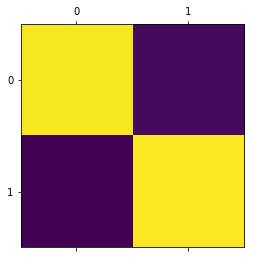

In [32]:
plt.matshow(cm)
plt.show()

0 params - {'vect__ngram_range': (1, 1)}; mean - 0.84; std - 0.01
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.86; std - 0.01
             precision    recall  f1-score   support

        neg       0.90      0.88      0.89        43
        pos       0.91      0.93      0.92        57

avg / total       0.91      0.91      0.91       100

[[38  5]
 [ 4 53]]


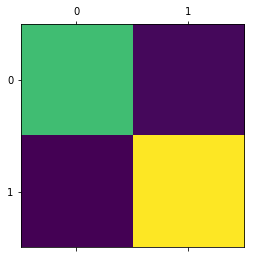

In [34]:
# let's try 5 percent of code to test the data
docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.05, random_state=None)

pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
        ('clf', LinearSVC(C=1000))])

# are unigrams or bigrams better? Bigrams: N=2
parameters = {'vect__ngram_range': [(1, 1), (1, 2)]}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
          % (grid_search.cv_results_['params'][i],
             grid_search.cv_results_['mean_test_score'][i],
             grid_search.cv_results_['std_test_score'][i]))

y_predicted = grid_search.predict(docs_test)

# display classification report (success percentage)
print(metrics.classification_report(y_test, y_predicted,target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

plt.matshow(cm)
plt.show()

0 params - {'vect__ngram_range': (1, 1)}; mean - 0.83; std - 0.02
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.86; std - 0.02
2 params - {'vect__ngram_range': (1, 3)}; mean - 0.86; std - 0.01
             precision    recall  f1-score   support

        neg       0.87      0.88      0.87        97
        pos       0.88      0.87      0.88       103

avg / total       0.88      0.88      0.88       200

[[85 12]
 [13 90]]


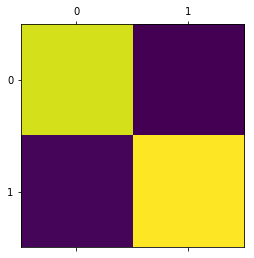

In [36]:
# let's try 10 percent of code to test the data
docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.10, random_state=None)

pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
        ('clf', LinearSVC(C=1000))])

# let's try tri-grams?  N=3
parameters = {'vect__ngram_range': [(1, 1), (1,2), (1, 3)]}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
          % (grid_search.cv_results_['params'][i],
             grid_search.cv_results_['mean_test_score'][i],
             grid_search.cv_results_['std_test_score'][i]))

y_predicted = grid_search.predict(docs_test)

# display classification report (success percentage)
print(metrics.classification_report(y_test, y_predicted,target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

plt.matshow(cm)
plt.show()

0 params - {'vect__ngram_range': (1, 1)}; mean - 0.82; std - 0.00
1 params - {'vect__ngram_range': (1, 8)}; mean - 0.85; std - 0.02
             precision    recall  f1-score   support

        neg       0.86      0.87      0.87       182
        pos       0.89      0.88      0.89       218

avg / total       0.88      0.88      0.88       400

[[159  23]
 [ 26 192]]


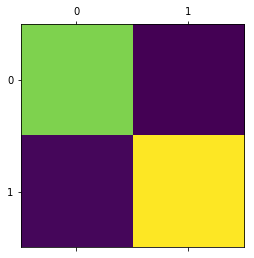

In [37]:
# let's try 20 percent of code to test the data
docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.2, random_state=None)

pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
        ('clf', LinearSVC(C=1000))])

# let's try octo-grams?  N=8
parameters = {'vect__ngram_range': [(1, 1), (1, 8)]}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
          % (grid_search.cv_results_['params'][i],
             grid_search.cv_results_['mean_test_score'][i],
             grid_search.cv_results_['std_test_score'][i]))

y_predicted = grid_search.predict(docs_test)

# display classification report (success percentage)
print(metrics.classification_report(y_test, y_predicted,target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

plt.matshow(cm)
plt.show()